In [62]:
# Load Iris dataset 
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
print("Size of dataset: ",df.size,"\n \n ",df.head())

Size of dataset:  900 
 
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  


C:\Users\ronak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

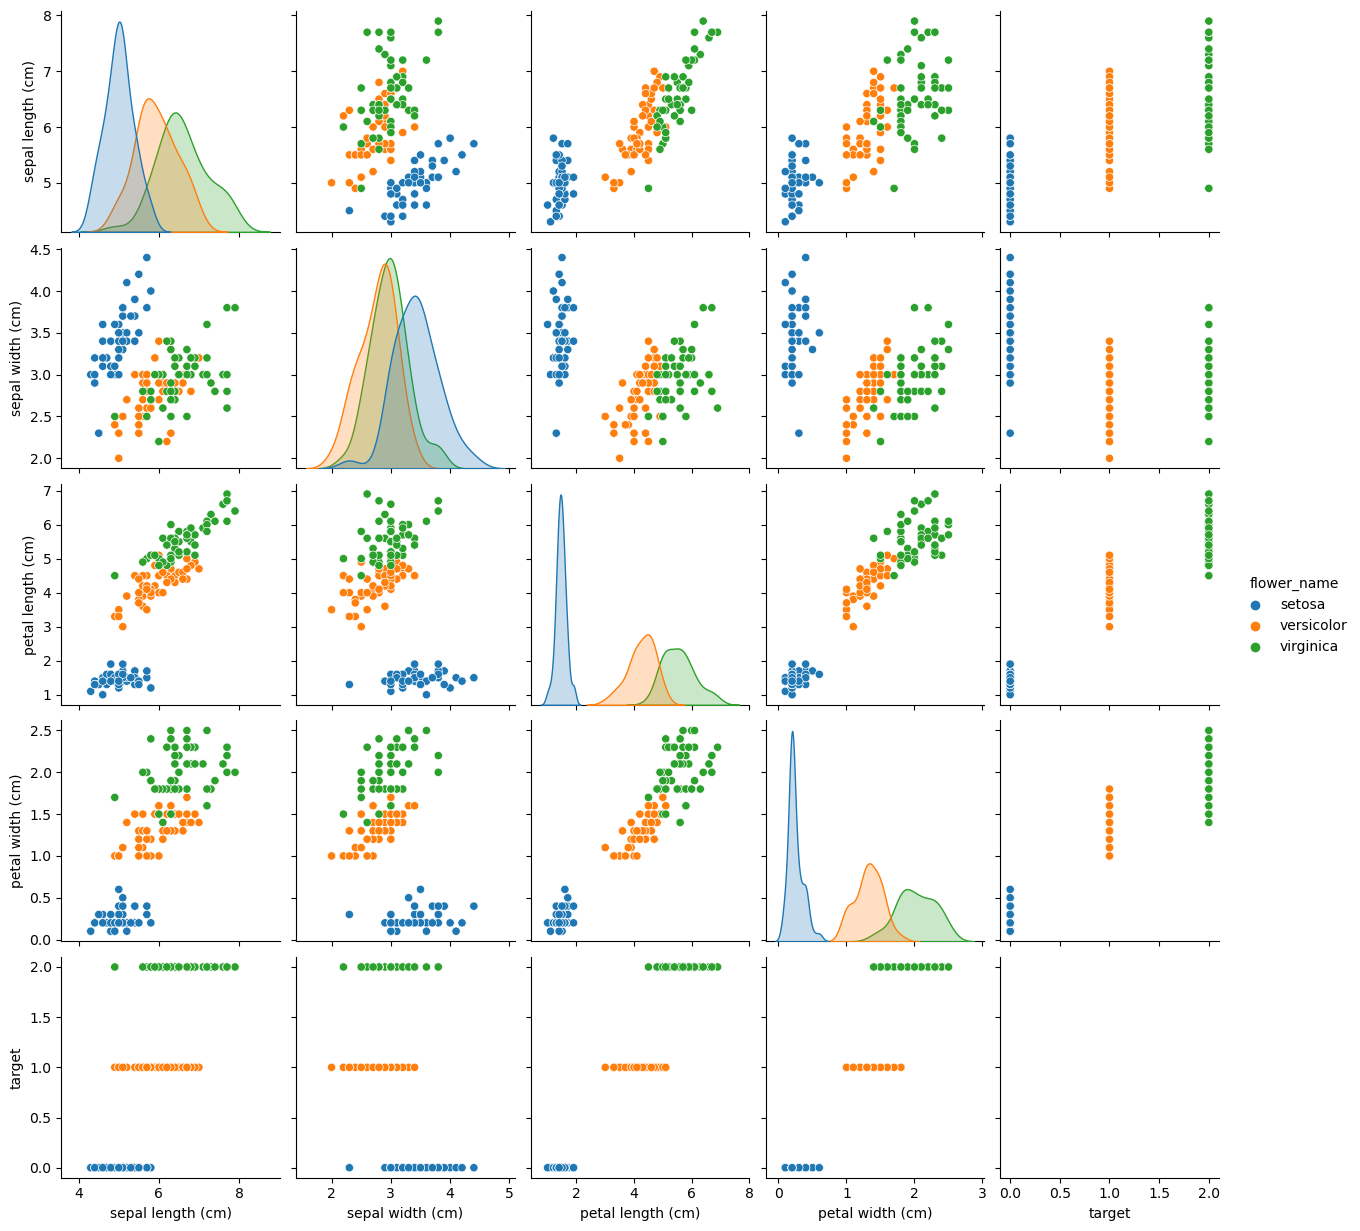

In [17]:
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, hue='flower_name', diag_kind='kde')
plt.show()

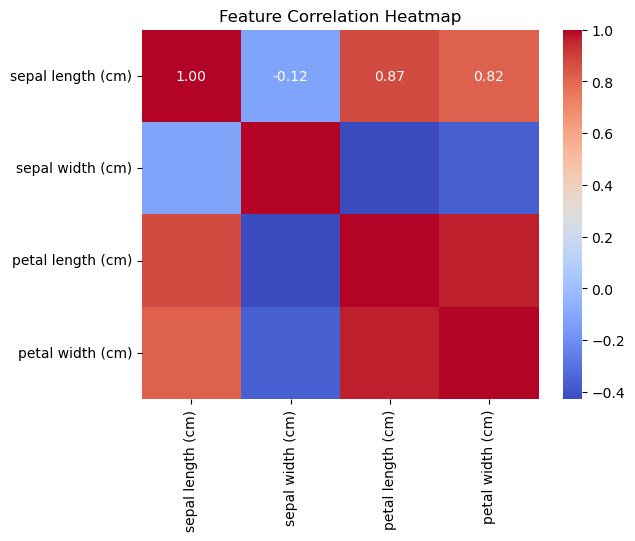

In [24]:
# Correlation Heatmap
import seaborn as sns

# Drop non-numeric columns (flower_name) and calculate correlation matrix
corr_matrix = df.drop(['target', 'flower_name'], axis=1).corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

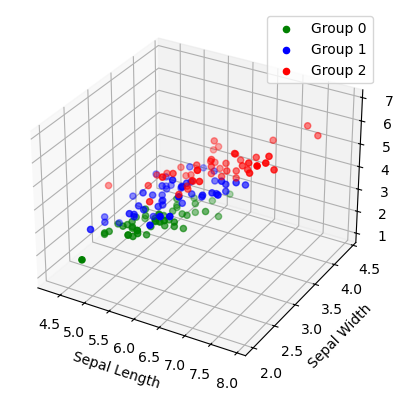

In [26]:
# 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], df0['petal length (cm)'], color='g', label='Group 0')
ax.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], df1['petal length (cm)'], color='b', label='Group 1')
ax.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], df2['petal length (cm)'], color='r', label='Group 2')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.legend()
plt.show()

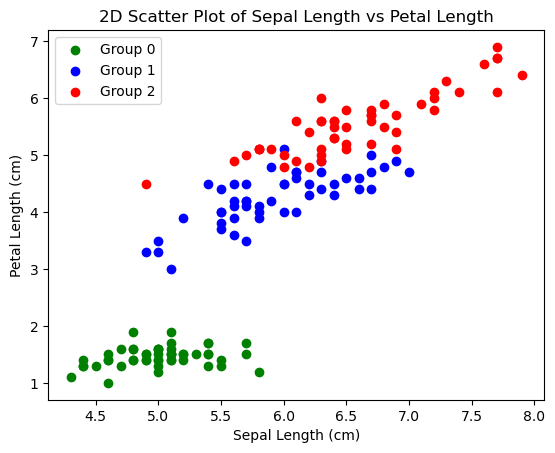

In [28]:
# Create a 2D scatter plot
plt.scatter(df0['sepal length (cm)'], df0['petal length (cm)'], color='g', label='Group 0')
plt.scatter(df1['sepal length (cm)'], df1['petal length (cm)'], color='b', label='Group 1')
plt.scatter(df2['sepal length (cm)'], df2['petal length (cm)'], color='r', label='Group 2')

# Label the axes
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')

# Add a legend and a title
plt.legend()
plt.title('2D Scatter Plot of Sepal Length vs Petal Length')
plt.show()


In [30]:
# Standardize Features
from sklearn.preprocessing import StandardScaler
x = df.drop(['target', 'flower_name'], axis=1)
y = df.target
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [32]:
# Train-Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, train_size=0.9)
print('Training data:', len(x_train))
print('Testing data:', len(x_test))

Training data: 135
Testing data: 15


In [34]:
# SVM Model and Hyperparameter Tuning
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': [1, 0.1, 0.01, 0.001]
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)
print("SVM Model Accuracy:", grid.score(x_test, y_test))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1

In [54]:
# Model Comparison
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print("Random Forest:\n", classification_report(y_test, rf.predict(x_test)))

# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print("KNN:\n", classification_report(y_test, knn.predict(x_test)))

# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print("Decision Tree:\n", classification_report(y_test, dt.predict(x_test)))

Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.80      1.00      0.89         4
           2       1.00      0.75      0.86         4

    accuracy                           0.93        15
   macro avg       0.93      0.92      0.92        15
weighted avg       0.95      0.93      0.93        15

KNN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.80      1.00      0.89         4
           2       1.00      0.75      0.86         4

    accuracy                           0.93        15
   macro avg       0.93      0.92      0.92        15
weighted avg       0.95      0.93      0.93        15

Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         4
           2       1.00      1.00    

In [56]:
# Cross-Validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(grid.best_estimator_, x_scaled, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.96666667 1.         0.96666667 0.93333333 1.        ]
Mean CV Accuracy: 0.9733333333333334


In [58]:
# Pipeline Creation
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel='rbf', C=1, gamma=0.1))
])
pipeline.fit(x_train, y_train)
print("Pipeline Model Accuracy:", pipeline.score(x_test, y_test))

Pipeline Model Accuracy: 0.9333333333333333


In [60]:
# Save and Load Model
import joblib
joblib.dump(grid.best_estimator_, 'svm_model.pkl')
loaded_model = joblib.load('svm_model.pkl')
print("Loaded Model Accuracy:", loaded_model.score(x_test, y_test))

Loaded Model Accuracy: 0.9333333333333333
